In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-tpbvp-mems)

```{index} ! Julia; in-place function
```

To define the BVP, we need to define some functions. (For this simple problem, we will use anonymous functions, but for a more substantial one, it would be better to use separate files.) The first defines $\mathbf{f}(x, \mathbf{y})$.

In [2]:
lambda = 0.6;
bvpfcn = @(r, y) [ y(2); lambda / y(1)^2 - y(2) / r  ];    % column vector

Our second function defines the boundary conditions. It takes $\mathbf{y}(a)$ and $\mathbf{y}(b)$ as arguments and returns a vector of residuals; i.e., values that should be zero when the boundary conditions are satisfied.

In [3]:
bcfcn = @(ya, yb) [ ya(2); yb(1) - 1 ];    % y_2(a) = 0;  y_1(b) = 1

The third function we define isn't part of the mathematical formulation. Rather, it provides an initial guess for the solution. Here we choose both components to be constant.

In [4]:
y_init = @(r) [ 1; 0 ];

Now we can solve the BVP using the `bvp4c` function. We need to specify the nodes on which to solve the problem. The domain of the mathematical problem is $r\in [0,1]$.But since there is a division by $r$ in the ODE, we want to avoid $r=0$ by truncating the domain a tiny bit.

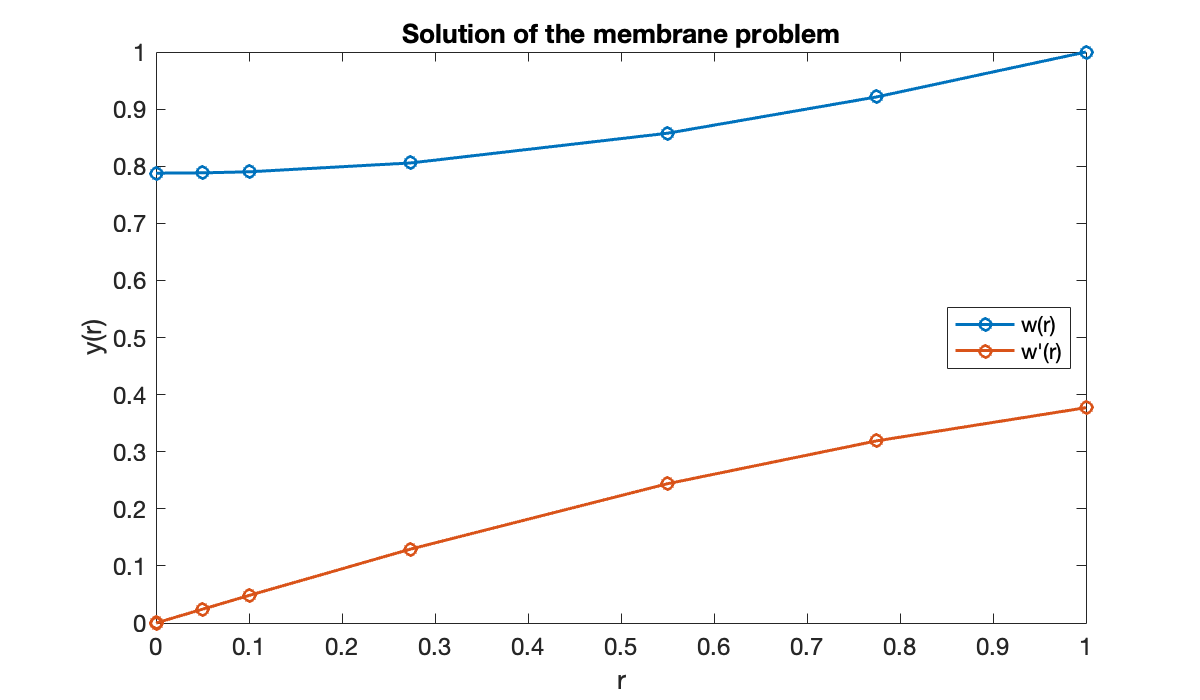

In [5]:
nodes = linspace(eps, 1, 61);
sol_init = bvpinit(nodes, y_init);
sol = bvp4c(bvpfcn, bcfcn, sol_init);
plot(sol.x, sol.y, '-o')
xlabel('r'), ylabel('y(r)')
title('Solution of the membrane problem')
legend("w(r)", "w'(r)", location="east");

It's smart to check visually that the boundary conditions are satisfied.